In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path_2017 = "/Users/Ruta/Downloads/2017.json"
d_2017 = pd.read_json(path_2017)

path_2018 = "/Users/Ruta/Downloads/2018.json"
d_2018 = pd.read_json(path_2018)

path_2019 = "/Users/Ruta/Downloads/2019.json"
d_2019 = pd.read_json(path_2019)

path_2020 = "/Users/Ruta/Downloads/2020.json"
d_2020 = pd.read_json(path_2020)

path_2021 = "/Users/Ruta/Downloads/2021.json"
d_2021 = pd.read_json(path_2021)

visi_d = pd.concat([d_2017, d_2018, d_2019, d_2020, d_2021])



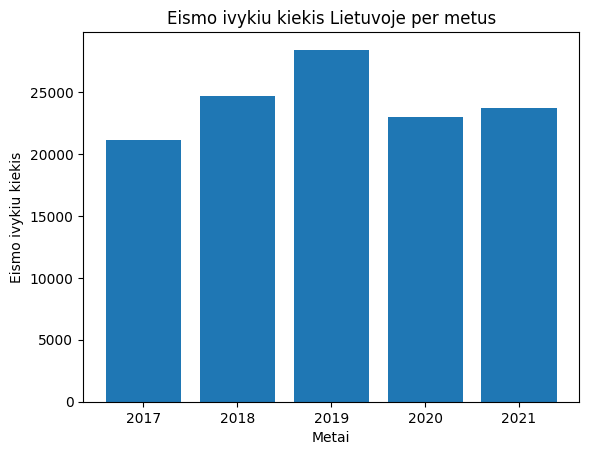

In [76]:
eismo_ivykiu_kiekis = [len(d_2017), len(d_2018), len(d_2019), len(d_2020), len(d_2021)]
metai = [2017, 2018, 2019, 2020, 2021]

plt.bar(metai, eismo_ivykiu_kiekis)
plt.xlabel('Metai')
plt.ylabel('Eismo ivykiu kiekis')
plt.title('Eismo ivykiu kiekis Lietuvoje per metus')
plt.show()

Matome, jog nuo 2017 iki 2019 m. buvo stebimas eismo ivykiu didejimas, o pandemijos ribojimu kupini 2020-ieji turejo net 5000 eismo ivykiu maziau.

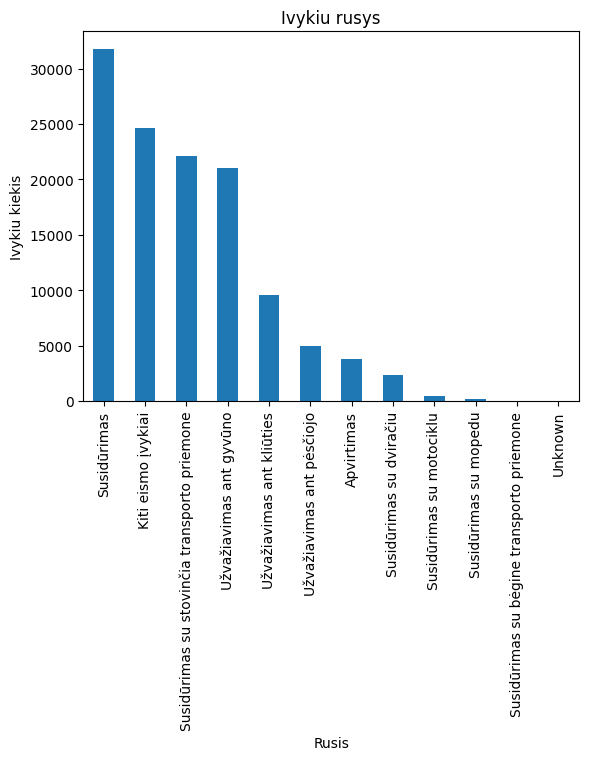

In [64]:
visi_d.fillna(value='Unknown', inplace=True)

ivykiu_rusys = visi_d['rusis'].unique()
ivykiu_kiekis = []
for rusys in ivykiu_rusys:
    kiekis = len(visi_d[visi_d['rusis'] == rusys])
    ivykiu_kiekis.append(kiekis)


rusys = visi_d.groupby('rusis').size()
rusys.sort_values(ascending=False)

rusys.sort_values(ascending=False).plot(kind='bar')
plt.title('Ivykiu rusys')
plt.xlabel('Rusis')
plt.ylabel('Ivykiu kiekis')
plt.show()

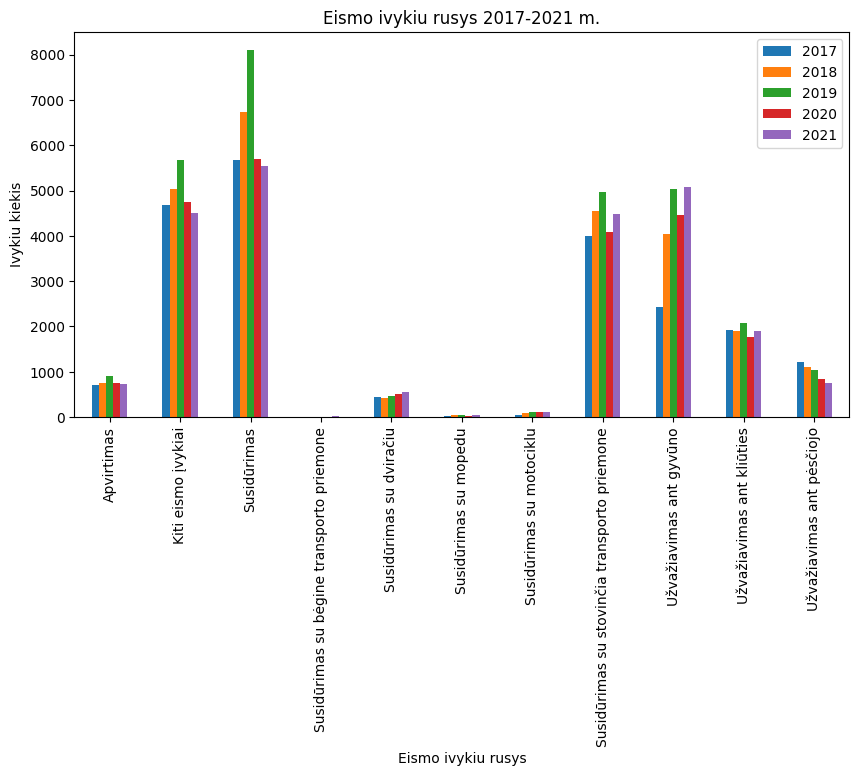

In [165]:
ivykiai2017 = d_2017.groupby('rusis').size()
ivykiai2018 = d_2018.groupby('rusis').size()
ivykiai2019 = d_2019.groupby('rusis').size()
ivykiai2020 = d_2020.groupby('rusis').size()
ivykiai2021 = d_2021.groupby('rusis').size()

ivykiu_kiekis_df = pd.concat([ivykiai2017, ivykiai2018, ivykiai2019, ivykiai2020, ivykiai2021], axis=1)
ivykiu_kiekis_df.columns = ['2017', '2018', '2019', '2020', '2021']

ivykiu_kiekis_df.plot(kind='bar', figsize=(10,5))
plt.title('Eismo ivykiu rusys 2017-2021 m.')
plt.xlabel('Eismo ivykiu rusys')
plt.ylabel('Ivykiu kiekis')
plt.show()

Is pateiktu diagramu matyti, jog visais metais dazniausia eismo ivykio rusis - susidurimas, ivykiu kiekiu toliau seka kitokie kitokie eismo ivykiai, susidurimai su stovinciomis transporto priemonemis, susidurimai su gyvunais.
Reciausiai ivyksta susidurimai su beginemis transporto priemonemis, mopedais.

Susidurimai dazniausiai vyko 2018 ir 2019 metais, 2019 ir 2021 metai issiskyre susidurimais su gyvunais, 2019 m. taip pat ivyko daugiausiai susidurimu su stovinciomis transporto priemonemis. Pesciuju suzalojimai tendencingai kasmet mazeja, tuo tarpu eismo ivykiai, kuriuose dalyvauja dviratininkai islieka stabilus, stebimas nezymus augimas.

2017 metais is viso eismo ivykiuose dalyvavo asmenu: 36960
2017 metais suzeista zmoniu: 3564 (9.64%)
2017 metais zuvo zmoniu: 192 (0.52%)

2018 metais is viso eismo ivykiuose dalyvavo asmenu: 42405
2018 metais suzeista zmoniu: 3389 (7.99%)
2018 metais zuvo zmoniu: 173 (0.41%)

2019 metais is viso eismo ivykiuose dalyvavo asmenu: 48691.0
2019 metais suzeista zmoniu: 3766 (7.73%)
2019 metais zuvo zmoniu: 186 (0.38%)

2020 metais is viso eismo ivykiuose dalyvavo asmenu: 38693
2020 metais suzeista zmoniu: 3168 (8.19%)
2020 metais zuvo zmoniu: 176 (0.45%)

2021 metais is viso eismo ivykiuose dalyvavo asmenu: 39958
2021 metais suzeista zmoniu: 3179 (7.96%)
2021 metais zuvo zmoniu: 147 (0.37%)



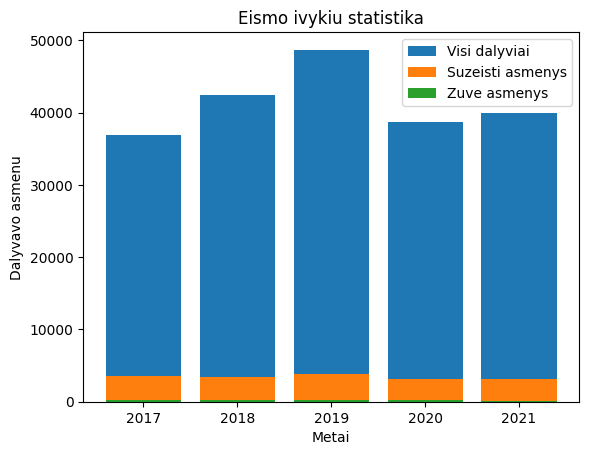

In [169]:
metai = [2017, 2018, 2019, 2020, 2021]

dalyvavo_asmenu = [
    d_2017['dalyviuSkaicius'].sum(),
    d_2018['dalyviuSkaicius'].sum(),
    d_2019['dalyviuSkaicius'].sum(),
    d_2020['dalyviuSkaicius'].sum(),
    d_2021['dalyviuSkaicius'].sum()
]

suzeisti = [
    d_2017['suzeistuSkaicius'].sum(),
    d_2018['suzeistuSkaicius'].sum(),
    d_2019['suzeistuSkaicius'].sum(),
    d_2020['suzeistuSkaicius'].sum(),
    d_2021['suzeistuSkaicius'].sum()
]
zuve = [
    d_2017['zuvusiuSkaicius'].sum(),
    d_2018['zuvusiuSkaicius'].sum(),
    d_2019['zuvusiuSkaicius'].sum(),
    d_2020['zuvusiuSkaicius'].sum(),
    d_2021['zuvusiuSkaicius'].sum()
]

for i in range(len(metai)):
    print(f"{metai[i]} metais is viso eismo ivykiuose dalyvavo asmenu: {dalyvavo_asmenu[i]}")
    print(f"{metai[i]} metais suzeista zmoniu: {suzeisti[i]} ({suzeisti[i]/dalyvavo_asmenu[i]*100:.2f}%)")
    print(f"{metai[i]} metais zuvo zmoniu: {zuve[i]} ({zuve[i]/dalyvavo_asmenu[i]*100:.2f}%)\n")

plt.bar(metai, dalyvavo_asmenu, label='Visi dalyviai')
plt.bar(metai, suzeisti, label='Suzeisti asmenys')
plt.bar(metai, zuve, label='Zuve asmenys')

plt.xlabel('Metai')
plt.ylabel('Dalyvavo asmenu')
plt.title('Eismo ivykiu statistika')

plt.legend()
plt.show()

Per visa laikotarpi is viso eismo ivykiuose dalyvavo 479187 zmones, suzeista 59965 zmoniu (12,51%), ir zuvo 1649 zmones (0,34%).

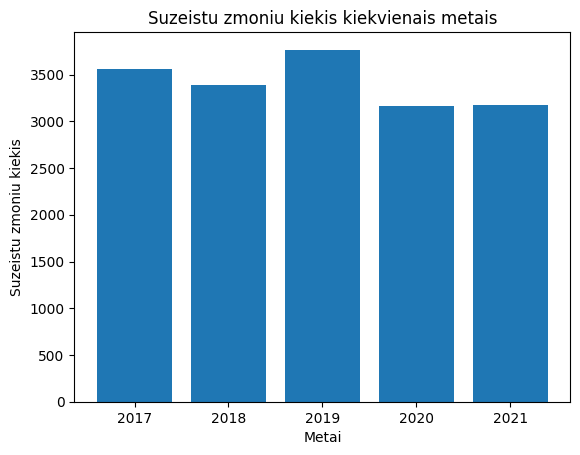

In [97]:
suzeisti = [d_2017['suzeistuSkaicius'].sum(), d_2018['suzeistuSkaicius'].sum(), d_2019['suzeistuSkaicius'].sum(), d_2020['suzeistuSkaicius'].sum(), d_2021['suzeistuSkaicius'].sum()]

plt.bar(metai, suzeisti)
plt.title('Suzeistu zmoniu kiekis kiekvienais metais')
plt.xlabel('Metai')
plt.ylabel('Suzeistu zmoniu kiekis')
plt.show()



Nors 2018 m. eismo ivykiuose buvo suzeista siek tiek maziau zmoniu, nei 2017 m., sis skaicius 2019 m. smarkiai isaugo. Taciau tai susije ir su tuo, kad eismo ivykiu 2019 m. buvo daugiausiai per 4 metus. 2020 ir 2021 m. stebimas suzeistu asmenu sumazejes ir vienodas kiekis.

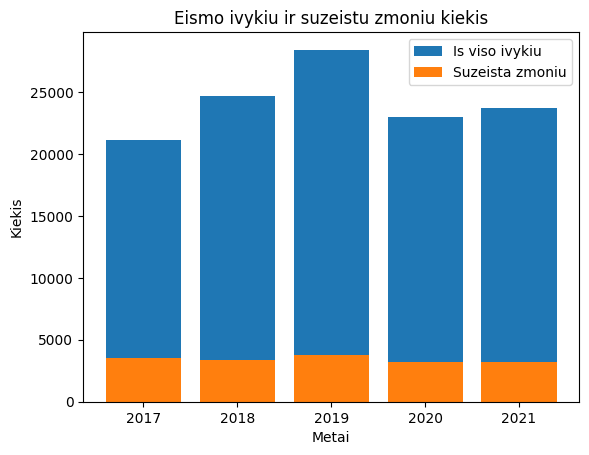

In [69]:
plt.bar(metai, eismo_ivykiu_kiekis, label='Is viso ivykiu')
plt.bar(metai, suzeisti, label='Suzeista zmoniu')

plt.xlabel('Metai')
plt.ylabel('Kiekis')
plt.title('Eismo ivykiu ir suzeistu zmoniu kiekis')

plt.legend()
plt.show()

Nepaisant to, kiek eismo ivykiu per metus ivyksta, suzeistu asmenu per juos skaicius islieka labai panasus, net ir vertinant bendra eismo ivykiu skaiciaus padidejima ar sumazejima.

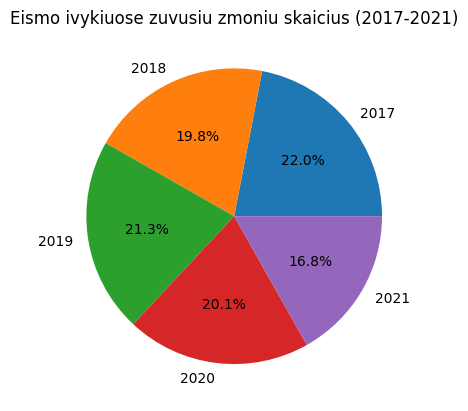

In [79]:
zuve = [d_2017['zuvusiuSkaicius'].sum(), d_2018['zuvusiuSkaicius'].sum(), d_2019['zuvusiuSkaicius'].sum(), d_2020['zuvusiuSkaicius'].sum(), d_2021['zuvusiuSkaicius'].sum()]
plt.pie(zuve, labels=metai, autopct='%1.1f%%')
plt.title('Eismo ivykiuose zuvusiu zmoniu skaicius (2017-2021)')
plt.show()

Daugiausiai eismo ivykiuose zuvusiu asmenu buvo 2017 m., nepaisant 2019 m. augimo yra matomas teigiamas sio rodiklio pokytis - lyginant su 2017 m., 2021 m. zuvusiuju buvo kiek daugiau nei 5 proc. maziau.

In [98]:
ivykiu_sk_2017 = len(d_2017)
ivykiu_sk_2018 = len(d_2018)
ivykiu_sk_2019 = len(d_2019)
ivykiu_sk_2020 = len(d_2020)
ivykiu_sk_2021 = len(d_2021)

max_ivykiu_sk = max(ivykiu_sk_2017, ivykiu_sk_2018, ivykiu_sk_2019, ivykiu_sk_2020, ivykiu_sk_2021)

if max_ivykiu_sk == ivykiu_sk_2017:
    print("Daugiausia eismo ivykiu buvo 2017 metais")
elif max_ivykiu_sk == ivykiu_sk_2018:
    print("Daugiausia eismo ivykiu buvo 2018 metais")
elif max_ivykiu_sk == ivykiu_sk_2019:
    print("Daugiausia eismo ivykiu buvo 2019 metais")
elif max_ivykiu_sk == ivykiu_sk_2020:
    print("Daugiausia eismo ivykiu buvo 2020 metais")
elif max_ivykiu_sk == ivykiu_sk_2021:
    print("Daugiausia eismo ivykiu buvo 2021 metais")

    
daugiausiai_suzeistu = metai[suzeisti.index(max(suzeisti))]
daugiausiai_zuvusiu = metai[zuve.index(max(zuve))]

print(f"Daugiausiai zmoniu buvo suzeista {daugiausiai_suzeistu} metais.")
print(f"Daugiausiai zmoniu zuvo {daugiausiai_zuvusiu} metais.")

Daugiausia eismo ivykiu buvo 2019 metais
Daugiausiai zmoniu buvo suzeista 2019 metais.
Daugiausiai zmoniu zuvo 2017 metais.


[613, 553, 588, 493, 554]


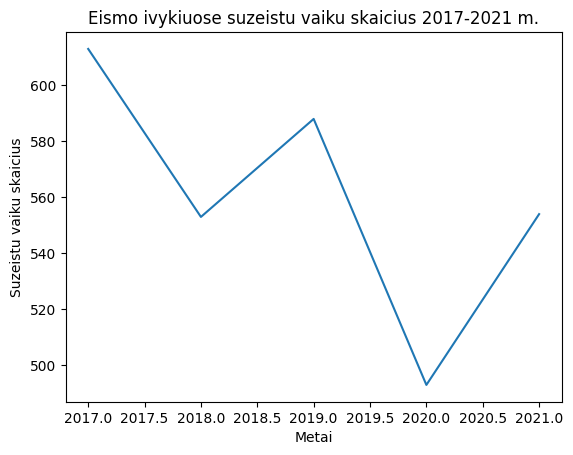

In [104]:
suzeisti_vaikai = [d_2017['suzeistaVaiku'].sum(), d_2018['suzeistaVaiku'].sum(), d_2019['suzeistaVaiku'].sum(), d_2020['suzeistaVaiku'].sum(), d_2021['suzeistaVaiku'].sum()]
print(suzeisti_vaikai)

plt.plot(metai, suzeisti_vaikai)
plt.title('Eismo ivykiuose suzeistu vaiku skaicius 2017-2021 m.')
plt.xlabel('Metai')
plt.ylabel('Suzeistu vaiku skaicius')
plt.show()

Nuo 2017 m. matomas mazejantis (su nedideliu 2019 m. nukrypimu) suzeistu vaiku skaicius.

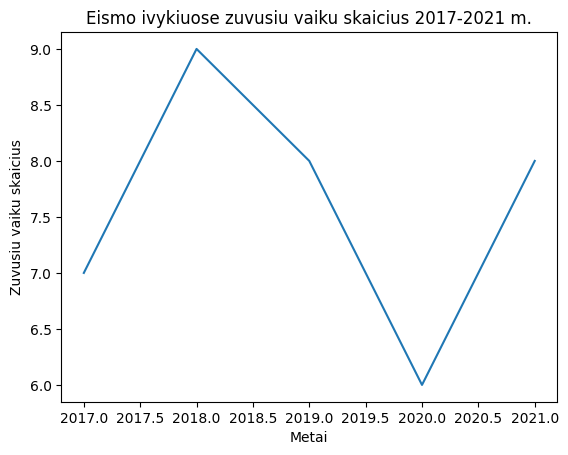

In [109]:
zuve_vaikai = [
    d_2017['zuvVaiku'].sum(),
    d_2018['zuvVaiku'].sum(),
    d_2019['zuvVaiku'].sum(),
    d_2020['zuvVaiku'].sum(),
    d_2021['zuvVaiku'].sum()
]
plt.plot(metai, zuve_vaikai)
plt.title('Eismo ivykiuose zuvusiu vaiku skaicius 2017-2021 m.')
plt.xlabel('Metai')
plt.ylabel('Zuvusiu vaiku skaicius')
plt.show()

Kaip ir suzeistu vaiku, zuvusiu skaicius nuo 2017 m. mazejo, maziausiai ju buvo 2020 m.

In [118]:
metai = [2017, 2018, 2019, 2020, 2021]
suzeisti = [d_2017['suzeistuSkaicius'].sum(), d_2018['suzeistuSkaicius'].sum(), d_2019['suzeistuSkaicius'].sum(), d_2020['suzeistuSkaicius'].sum(), d_2021['suzeistuSkaicius'].sum()]
zuve = [d_2017['zuvusiuSkaicius'].sum(), d_2018['zuvusiuSkaicius'].sum(), d_2019['zuvusiuSkaicius'].sum(), d_2020['zuvusiuSkaicius'].sum(), d_2021['zuvusiuSkaicius'].sum()]

suzeisti_vaikai_proc = [suzeisti_vaikai[i] / suzeisti[i] * 100 for i in range(len(metai))]
for i in range(len(metai)):
    print(f"{metai[i]} metais suzeista vaiku: {suzeisti_vaikai[i]/suzeisti[i]*100:.2f}%")

zuve_vaikai_proc = [zuve_vaikai[i] / zuve[i] * 100 for i in range(len(metai))]
for i in range(len(metai)):
    print(f"{metai[i]} metais zuvo vaiku: {zuve_vaikai[i]/zuve[i]*100:.2f}%")

min_zuve_vaikai = min(zuve_vaikai)
min_zuve_metai = metai[zuve_vaikai.index(min_zuve_vaikai)]
print(f"Maziausiai vaiku zuvo {min_zuve_metai} metais: {min_zuve_vaikai}")

max_zuve_vaikai = max(zuve_vaikai)
max_zuve_metai = metai[zuve_vaikai.index(max_zuve_vaikai)]
print(f"Daugiausiai vaiku zuvo {max_zuve_metai} metais: {max_zuve_vaikai}")

2017 metais suzeista vaiku: 17.20%
2018 metais suzeista vaiku: 16.32%
2019 metais suzeista vaiku: 15.61%
2020 metais suzeista vaiku: 15.56%
2021 metais suzeista vaiku: 17.43%
2017 metais zuvo vaiku: 3.65%
2018 metais zuvo vaiku: 5.20%
2019 metais zuvo vaiku: 4.30%
2020 metais zuvo vaiku: 3.41%
2021 metais zuvo vaiku: 5.44%
Maziausiai vaiku zuvo 2020 metais: 6
Daugiausiai vaiku zuvo 2018 metais: 9


Neblaivus kaltininkai: 6626
Apsvaige kaltininkai: 36
Eismo ivykiu dalis, kuriuos sukele neblaivus ar apsvaige kaltininkai: 5.507105008638434 proc.


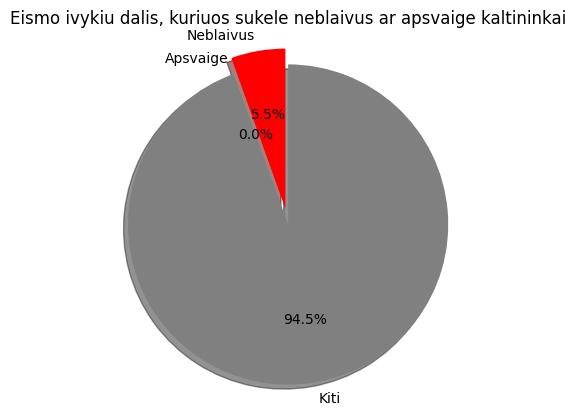

In [166]:
neblaivus_kaltininkai = visi_d[visi_d['neblaivusKaltininkai'] == 'Taip'].shape[0]
apsvaige_kaltininkai = visi_d[visi_d['apsvaigeKaltininkai'] == 'Taip'].shape[0]

print(f"Neblaivus kaltininkai: {neblaivus_kaltininkai}")
print(f"Apsvaige kaltininkai: {apsvaige_kaltininkai}")

procentai_neblaivu_kaltininku = (neblaivus_kaltininkai / ivykiu_kiekis_df.sum().sum()) * 100
procentai_apsvaigu_kaltininku = (apsvaige_kaltininkai / ivykiu_kiekis_df.sum().sum()) * 100

bendrai_girti = procentai_neblaivu_kaltininku + procentai_apsvaigu_kaltininku

print(f"Eismo ivykiu dalis, kuriuos sukele neblaivus ar apsvaige kaltininkai: {bendrai_girti} proc.")

labels = ['Neblaivus', 'Apsvaige', 'Kiti']
sizes = [procentai_neblaivu_kaltininku, procentai_apsvaigu_kaltininku, 100-bendrai_girti]
colors = ['red', 'orange', 'gray']
explode = (0.1, 0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Eismo ivykiu dalis, kuriuos sukele neblaivus ar apsvaige kaltininkai")
plt.show()


Kiek daugiau nei 5 proc. neblaiviu ar apsvaigusiu asmenu sukele eismo ivykius 2017-2021 m.

Neblaivus ar apsvaige kaltininkai dalyvavo 982 ivykiuose, kur buvo suzaloti ar zuvo zmones.
Neblaivus ar apsvaige kaltininkai dalyvavo 0.81% ivykiuose, kur buvo suzaloti ar zuvo zmones.


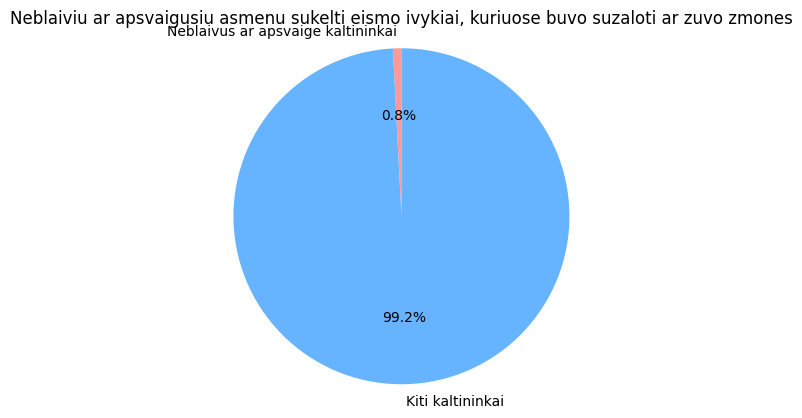

In [130]:
neblaivus_kaltininkai = visi_d[visi_d['neblaivusKaltininkai'] == 'Taip'].shape[0]
apsvaige_kaltininkai = visi_d[visi_d['apsvaigeKaltininkai'] == 'Taip'].shape[0]


suzeisti_zuve_zmones = visi_d[(visi_d['zuvusiuSkaicius'] > 0) | (visi_d['suzeistuSkaicius'] > 0)]
neblaivus_apsvaige = suzeisti_zuve_zmones[(suzeisti_zuve_zmones['neblaivusKaltininkai'] == 'Taip') | (suzeisti_zuve_zmones['apsvaigeKaltininkai'] == 'Taip')]

neblaivus_apsvaige_count = neblaivus_apsvaige.shape[0]
print(f"Neblaivus ar apsvaige kaltininkai dalyvavo {neblaivus_apsvaige_count} ivykiuose, kur buvo suzaloti ar zuvo zmones.")

procentas = neblaivus_apsvaige_count / ivykiu_kiekis_df.sum().sum() * 100
print(f"Neblaivus ar apsvaige kaltininkai dalyvavo {procentas:.2f}% ivykiuose, kur buvo suzaloti ar zuvo zmones.")

labels = ['Neblaivus ar apsvaige kaltininkai', 'Kiti kaltininkai']
sizes = [neblaivus_apsvaige_count, ivykiu_kiekis_df.sum().sum() - neblaivus_apsvaige_count]
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Neblaiviu ar apsvaigusiu asmenu sukelti eismo ivykiai, kuriuose buvo suzaloti ar zuvo zmones')
plt.show()


Suskaiciave matome, jog per 4 metus neblaivus ar kitaip apsvaige asmenys sukele maziau nei 1 proc. eismo ivykiu, kuriuose buvo suzaloti arba zuvo zmones.

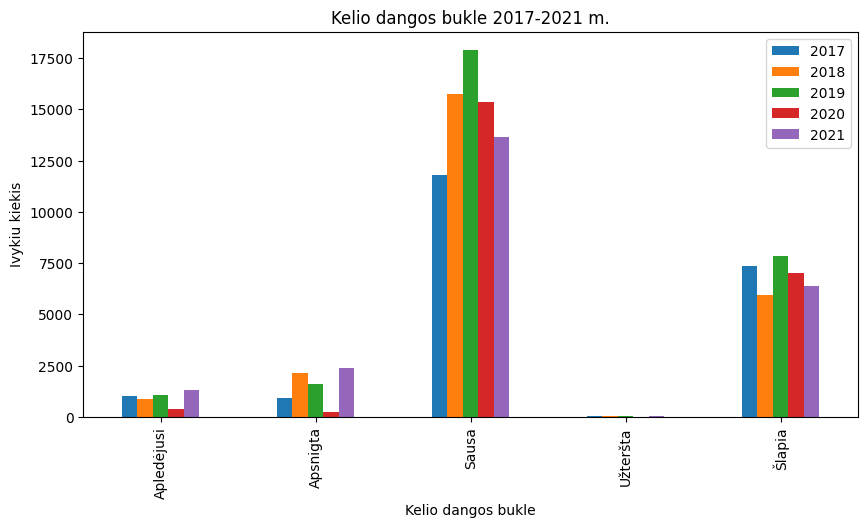

In [168]:
i2017 = d_2017.groupby('dangosBukle').size()
i2018 = d_2018.groupby('dangosBukle').size()
i2019 = d_2019.groupby('dangosBukle').size()
i2020 = d_2020.groupby('dangosBukle').size()
i2021 = d_2021.groupby('dangosBukle').size()

i_kiekis_df = pd.concat([i2017, i2018, i2019, i2020, i2021], axis=1)
i_kiekis_df.columns = ['2017', '2018', '2019', '2020', '2021']
i_df = i_kiekis_df.fillna(0)

i_kiekis_df.plot(kind='bar', figsize=(10,5))
plt.title('Kelio dangos bukle 2017-2021 m.')
plt.xlabel('Kelio dangos bukle')
plt.ylabel('Ivykiu kiekis')
plt.show()

Dazniausiai eismo ivykiai ivyksta esant sausai kelio dangai, po to - slapiai. Eismo ivykiai ant uzterstos kelio dangos ivyksta reciausiai

Is viso 2017-2021 m. yra ivyke 46561 eismo ivykiai, kur kelio danga nebuvo sausa.
Eismo ivykiu dalis, kuriuose dangos bukle buvo slapia, apsnigta arba apledejusi: 38.49%


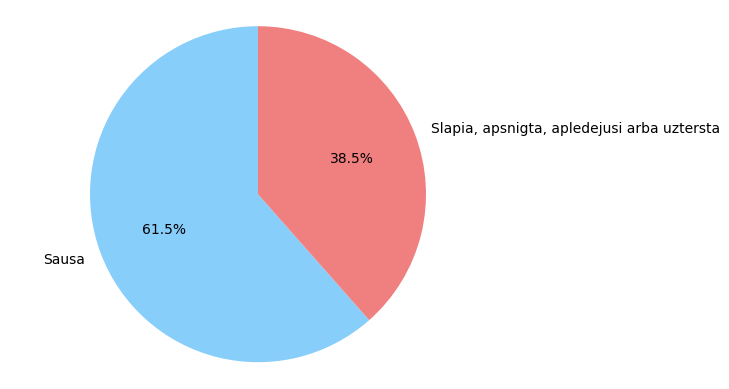

In [164]:
ne_sausa = i_df.loc[["Šlapia", "Apsnigta", "Apledėjusi", "Užteršta"]].sum().sum()
print(f"Is viso 2017-2021 m. yra ivyke {ne_sausa} eismo ivykiai, kur kelio danga nebuvo sausa.")
procentai_ne_sausa= (ne_sausa / ivykiu_kiekis_df.sum().sum()) * 100
print(f"Eismo ivykiu dalis, kuriuose dangos bukle buvo slapia, apsnigta arba apledejusi: {procentai_ne_sausa:.2f}%")

labels = ['Sausa', 'Slapia, apsnigta, apledejusi arba uztersta']
sizes = [ivykiu_kiekis_df.sum().sum() - ne_sausa, ne_sausa]
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

Nors daugiau nei 46000 eismo ivykiai per ketverius metus ivyko nesant sausai kelio dangai, taciau tai tesudaro vos daugiau nei trecdali visu per si laika ivykusiu eismo ivykiu.

2019 metai issiskyre didesniu eismo ivykiu skaiciumi, ka galejo lemti visuomenes isgastis del pasaulyje vyraujancios pandemijos, taip vairuotojams tampant ne tokiems demesingiems. Nors 2021 m. ivyko daugiau nei eismo ivykiu nei 2020 m., suzeistu ir zuvusiu asmenu skaicius sumazejo. Tai rodo didejanti eismo sauguma ir zmoniu samoninguma itemptose situacijose keliuose. Nors suzalotu ir zuvusiu vaiku nera daug, taciau ju buvimas rodo nepakankama vaiku sauguma keliuose. Nors visuomeneje vyrauja nuostata, jog apsvaige asmenys sukelia daugybe eismo ivykiu, tai nera tiesa. Apsvaigusiu asmenu sukelti eismo ivykiai, ypac, jei juose suzalojami ar zuva zmones, yra transliuojami televizijoje ir aprasomi spaudoje, taip pritraukiant didesni demesi. Vis delto, vertetu atkreipti demesi i vairuotoju pasirengima esant neidealioms oro salygoms ir kelio dangos buklei - beveik 40 proc. eismo ivykiu ivyksta del siu priezasciu, kas parodo, kad Lietuvos vairuotojai nera tinkamai rengiami trims ketvirtadaliams metu laiko, kuomet kelio dangos bukle nera sausa.